# Lab 5-1: Model Selection: Classification

## Data

We will use Mortgage Affordability data from Zillow to experiment with classification algorithms. The data was downloaded from [Zillow Research](https://www.zillow.com/research/data/) page. Please download the Affordability_Wide_2017Q4_Public.csv file to your project directory.

## Preparing the data

First, we will tidy the data. Please include this piece of code in your submission.

In [5]:
import pandas as pd
import numpy as np
from plotnine import *

theme_set(theme_bw())

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# Read and prepare data

df = (pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML Class/Week 13/Affordability_Wide_2017Q4_Public.csv')
        .query('Index == "Mortgage Affordability" and SizeRank != 0')
        .drop(columns=['Index', 'HistoricAverage_1985thru1999','SizeRank'])
        .dropna()
        .melt(id_vars=['RegionID','RegionName'],
              var_name='time', value_name='affordability'))
df['time'] = pd.to_datetime(df.time, format="%Y-%m")
df.head()

,RegionID,RegionName,time,affordability
0,394913,"New York, NY",1979-03-01,0.261700
1,753899,"Los Angeles-Long Beach-Anaheim, CA",1979-03-01,0.357694
2,394463,"Chicago, IL",1979-03-01,0.261928
3,394514,"Dallas-Fort Worth, TX",1979-03-01,0.301131
4,394974,"Philadelphia, PA",1979-03-01,0.204333


This is what the data looks like:

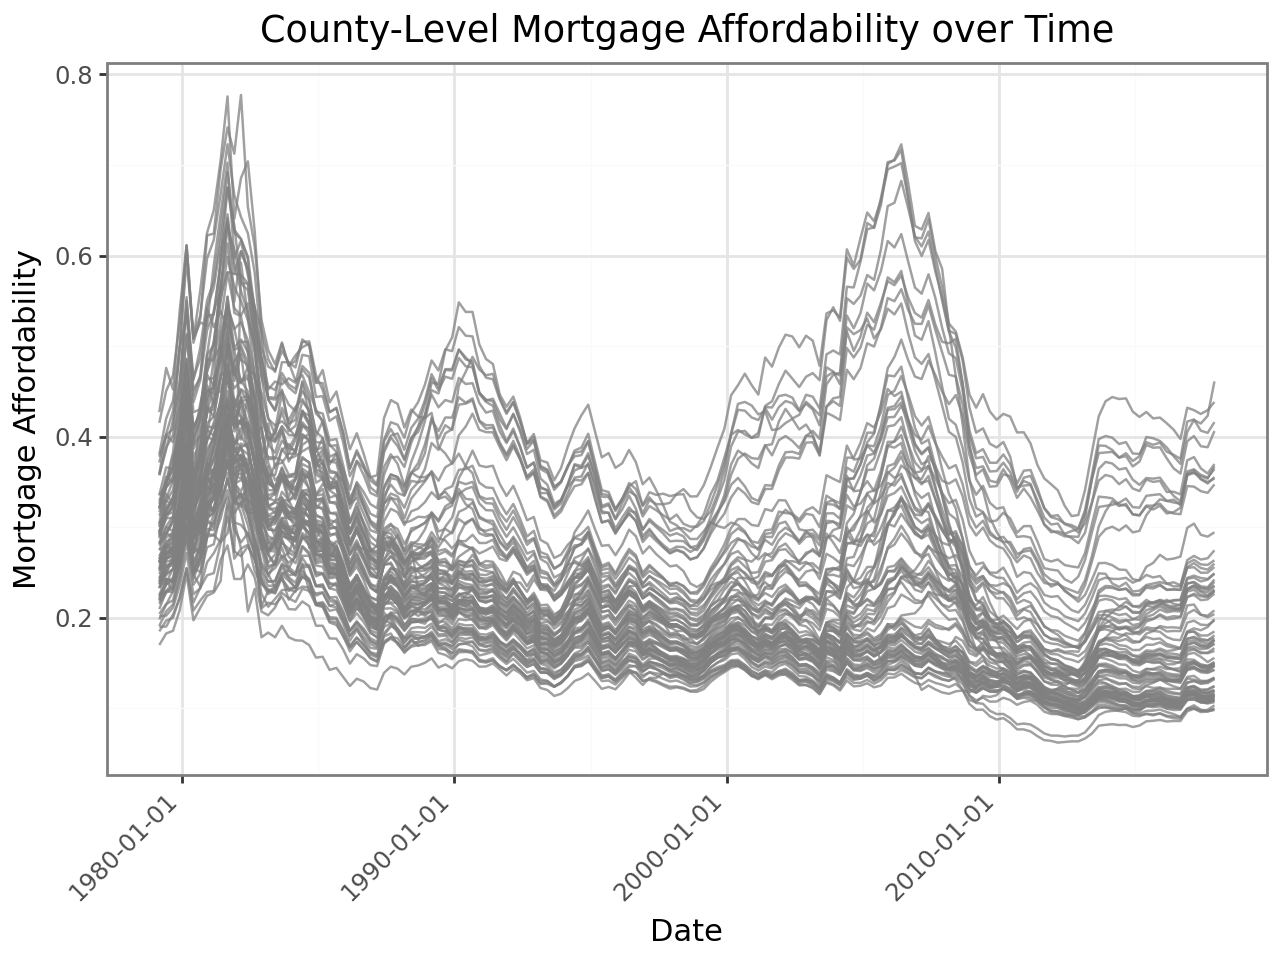

In [ ]:
# plot data

(ggplot(df, aes(x='time', y='affordability', group='factor(RegionID)')) +
  geom_line(color="GRAY", alpha=3/4, size=1/2) +
  theme(axis_text_x=element_text(angle=45,hjust=1)) +
  labs(title="County-Level Mortgage Affordability over Time",
          x="Date", y="Mortgage Affordability"))

## The prediction task

The prediction task we are going to answer is: `Can we predict if mortgage affordability will increase or decrease a year from now?` Specifically, we will do this for quarter 4 (Q4) of 2017. To create the prediction outcome, we will compare affordability for Q4 of 2017 to Q4 of 2016 and label it as `up` or `down`, depending on the sign of the this difference. Let's create the outcome we want to predict (again, copy this bit of code to your submission):

In [ ]:
outcome_dates = ['2016-12-01', '2017-12-01']
outcome_df = (df.query('time in @outcome_dates')
   .pivot(index='RegionID', columns='time', values='affordability'))

outcome_df['diff'] = outcome_df['2017-12-01'] - outcome_df['2016-12-01']
outcome_df['Direction'] = 'Down'
outcome_df['Direction'] = outcome_df['Direction'].where(outcome_df['diff'] < 0, 'Up') # this replaces where conditions is False
outcome_df = outcome_df.reset_index()[['RegionID','Direction']]
outcome_df.head()

<ipython-input-5-9b92e45ee030>:2: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.


time,RegionID,Direction
0,394304,Down
1,394312,Down
2,394318,Down
3,394347,Up
4,394355,Up


Now you have a dataframe with outcomes (labels) for each county in the dataset. The goal is then:  given predictors $X_i$ for county $i$, build a classifier for outcome $G_i \in \{\mathtt{up},\mathtt{down}\}$.

To train your classifiers you should use data up to 2016:

In [ ]:
predictor_df = df.query('time < 20170101')

## Your Project's Goal
Your goal for this project is to do an experiment to address a (one, single) technical question about our ability to make this prediction. Here is a list of possible questions you may address below. Each of them asks to compare two specific choices in the classification workflow (e.g., two classification algorithms, two feature representations, etc.).

You will *implement* each of the two choices and use *10-fold cross validation* (across RegionID's) to compare their relative performance. You will also create an *AUROC curve* to compare them.

## Possible Questions

### Feature representation and preprocessing
- Does standardizing affordability for each region affect  prediction performance? Compare standardized to non-standardized affordability.
- Is using quarter to quarter change (continuous or discrete) improve prediction performance? Compare quarter to quarter change in affordability as predictors to affordability as predictor?
- Should we use the full time series for each region, or should we use only the last few years? Compare full time series to a subset of the time series?
- Should we expand the training set to multiple time series per region? For example, create a similar outcome for each time point in the dataset (change relative to affordability one year ago) and use data from the last couple of years as predictors. Train on the extended dataset and test on the 2017 data above?
- Should we do dimensionality reduction (PCA) and use the embedded data to do prediction?

*Create your own question!*

### Classification Algorithm

- Is a decision tree better than logistic regression?
- Is a random forest better than a decision tree?
- Is k-nearest neighbors better than a random forest?

*Create your own question!*

Note that you still have to make some choices regardless of the question you choose. For example, to do the feature preprocessing and representation experiments you have to choose a classifier (random forest for example), and decide what to do about hyper-parameters if appropriate.

# Submission
Prepare a Jupyter/IPython notebook that which includes:

1. Code to prepare data (copied from chunks above), plus any additional data prep for your experiment
2. Discussion of the question you have chosen to address, including discussion of other choices you have made (e.g., feature representation, classification algorithm) to carry out your experiment
3. Code to carry out your cross-validation experiment
4. Table (result of hypothesis testing difference between algorithms) and plot comparing AUROCs
	* ROC curves for both experimental settings
5. Interpretation and discussion of your experimental results



Homework Submission start

Question I am answering:Is k-nearest neighbors better than a linear State Vector Machine? We will predict if an area is affordable. I will create a label variable called eco where it is based on the mean of the affordability. And we will predict if an area was affordable in 2017-12-01. So for the x data it will be from 1979-2017 and the y data is the eco collumn from those dates

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Index(['2017-12'], dtype='object')
0.153535333515154
KNN Average score: 57.857142857142854%
Decision Tree Average score: 98.57142857142858%


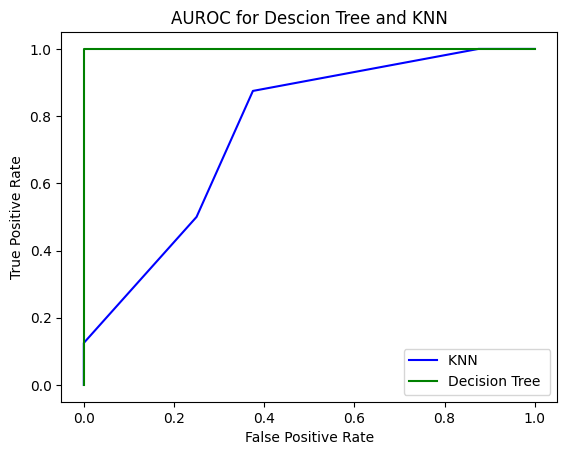

In [21]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
import torch
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score
import pandas as pd
import numpy as np
from plotnine import *
theme_set(theme_bw())
from google.colab import drive
import statistics
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
drive.mount('/content/drive')

# Read and prepare data
df = (pd.read_csv(r'/content/drive/MyDrive/Colab Notebooks/ML Class/Week 13/Affordability_Wide_2017Q4_Public.csv')
        .query('Index == "Mortgage Affordability" and SizeRank != 0')
        .drop(columns=['Index', 'HistoricAverage_1985thru1999', 'SizeRank'])
        .dropna())


date = df.columns[df.columns.str.contains("2017-12")]
print(date)


afford_values=[]
for i,j in df['2017-12'].items():
   afford_values.append(j)

threshold = statistics.median(afford_values)
print(threshold)

df['2017-12-eco'] = 0
df['2017-12-eco'] = df['2017-12-eco'].where(df['2017-12'] < threshold, 1)


df1=df.copy()
df1 = df.select_dtypes(include=[np.number])
df1.drop(columns=['2017-12'], inplace=True)
df1.head()

##############################################
#Seperate into x and y
X=df1.drop(columns=df1.columns[-1])
#X.head()
Y=df1[df1.columns[-1]]
#Y.head()
#Set up ML algorithims


##############################################
#print(Y.head())
#Split into train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


#Setting up cross validation
k_folds = KFold(n_splits = 10)

#Intialize KNN
knn = KNeighborsClassifier(n_neighbors=5)

#Preform 10 fold Cross validation
knnscores = cross_val_score(knn, X_train, Y_train, cv = k_folds)
print("KNN Average score: " + repr(knnscores.mean()*100)+"%")




#Preform 10 fold Cross validation for descion tree
tree = DecisionTreeClassifier()
treescores = cross_val_score(tree, X_train, Y_train, cv=k_folds)
print("Decision Tree Average score: " + repr(treescores.mean()*100) + "%")


#####################################################
#plotting auroc

knn.fit(X_train, Y_train)
prob_knn = knn.predict_proba(X_test)[:, 1]

tree.fit(X_train, Y_train)
prob_tree = tree.predict_proba(X_test)[:, 1]

f_knn, t_knn, _ = roc_curve(Y_test, prob_knn)
auc_knn = auc(f_knn, t_knn)


f_tree, t_tree, _ = roc_curve(Y_test, prob_tree)
auc_tree = auc(f_tree, t_tree)

# Plot ROC curve
plt.figure
plt.plot(f_knn, t_knn, color='blue',  label='KNN ' % auc_knn)
plt.plot(f_tree, t_tree, color='green',  label='Decision Tree ' % auc_tree)
plt.title("AUROC for Descion Tree and KNN")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right")

In [24]:
pred=knn.predict(X_test)
print( accuracy_score(Y_test, pred))

pred=tree.predict(X_test)
print( accuracy_score(Y_test, pred))

0.625
1.0


Here we can see that the Descrion tree preforms much better than the KNN.We also can see that the AUROC for the Descion tree is also better compared to the KNN as the descion tree has an AUROC score of 1. I assumed the model was overfitting, however when testing the data on X and Y test I got an accuracy of 100%. This is because the model is more complex compared to a KNN, and since we are doing a binary classifier there are two options, therefore the descion tree will have a much higher accuracy compared to the KNN. I suggest that if we mess around with the K value the model could be more accurate.


# An example experiment

Question: Does the number of trees used in a random forest classifier affect performance (AUROC measured with 5-fold CV)?

Other decisions: We are transforming input data to use quarterly differences after data standardization for years 2014-2016.

## Data preparation

First, filter to the years of interest and standardize affordability for each region.

In [ ]:
# Subset data and compute mean and standard deviation per region
tmp_df = predictor_df.query('time > 20131201 & time < 20170101')
stat_df = tmp_df.groupby('RegionID').agg({'affordability': ['mean', 'std']})
stat_df.columns = stat_df.columns.get_level_values(1)
stat_df.reset_index(col_level=1).set_index('RegionID')

# Standardize affordability for each region
std_df = tmp_df.set_index('RegionID').join(stat_df)
std_df['std_affordability'] = (std_df['affordability'] - std_df['mean'])/std_df['std']
std_df.head()

,RegionName,time,affordability,mean,std,std_affordability
RegionID,,,,,,
394913,"New York, NY",2014-03-01,0.258141,0.246122,0.008536,1.408150
753899,"Los Angeles-Long Beach-Anaheim, CA",2014-03-01,0.398916,0.390070,0.011075,0.798722
394463,"Chicago, IL",2014-03-01,0.141666,0.136329,0.004224,1.263667
394514,"Dallas-Fort Worth, TX",2014-03-01,0.123380,0.127295,0.007789,-0.502663
394974,"Philadelphia, PA",2014-03-01,0.152352,0.143662,0.005178,1.678264


To train our model we need a table with one row per region, and attributes corresponding to differences in quarterly affordability. We will do this in stages, first we turn the tidy dataset into a wide dataset using `pd.pivot` then create a dataframe containing the differences we use as features.

In [ ]:
# Switch to a 'wide' data frame
std_df['RegionID'] = std_df.index
std_df = (std_df[['RegionID','time','std_affordability']]
  .pivot(index='RegionID', columns='time', values='std_affordability'))

# Construct matrix of quarterly differences
mat1 = std_df.iloc[:,1:].to_numpy()
mat2 = std_df.iloc[:,:-1].to_numpy()
X = mat1 - mat2

# Get the outcome from the dataframe we created
outcome_df['y'] = 0
outcome_df['y'] = outcome_df['y'].where(outcome_df['Direction'] == "Down", 1)
y = outcome_df['y'].to_numpy()

## Run the experiment

We will only use 5-fold cross-validation to compare a random forest with 500 trees, with a random forest with 10 trees. Since this is a smallish dataset,  we are using 5-fold cross validation to make the validation sets have more examples and therefore more reliable performance estimates.

In [ ]:
import sklearn.ensemble
import sklearn.model_selection
import sklearn.metrics
import matplotlib.pylab as plt
import numpy as np

In [ ]:
small_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=10)
big_rf = sklearn.ensemble.RandomForestClassifier(n_estimators=500)

parameters = {'max_features': [2,6,11]} # we do this to match what the R version did
small_cv = sklearn.model_selection.GridSearchCV(small_rf, parameters, cv=5)
big_cv = sklearn.model_selection.GridSearchCV(big_rf, parameters, cv=5)

# Following sklearn tutorial
# https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc_crossval.html#sphx-glr-auto-examples-model-selection-plot-roc-crossval-py
cv_obj = sklearn.model_selection.StratifiedKFold(n_splits=5)


def get_roc_data(model, cv_obj):
    curve_df = None
    aucs = []
    mean_fpr = np.linspace(0, 1, 100)

    for i, (train, test) in enumerate(cv_obj.split(X, y)):
        model.fit(X[train], y[train])
        scores = model.predict_proba(X[test])[:,1]
        fpr, tpr, _ = sklearn.metrics.roc_curve(y[test],scores)

        interp_tpr = np.interp(mean_fpr, fpr, tpr)
        interp_tpr[0] = 0.0
        tmp = pd.DataFrame({'fold':i, 'fpr': mean_fpr, 'tpr': interp_tpr})
        curve_df = tmp if curve_df is None else pd.concat([curve_df, tmp])

        aucs.append(sklearn.metrics.auc(fpr, tpr))

    curve_df = curve_df.groupby('fpr').agg({'tpr': 'mean'}).reset_index()
    curve_df.iloc[-1,1] = 1.0

    auc_df = pd.DataFrame({'fold': np.arange(len(aucs)), 'auc': aucs})
    return curve_df, auc_df

In [ ]:
# Get ROC curve data for small model
small_curve_df, small_auc_df = get_roc_data(small_cv, cv_obj)
small_curve_df['model'] = 'small'
small_auc_df['model'] = 'small'

In [ ]:
# Get ROC curve data for big model
big_curve_df, big_auc_df = get_roc_data(big_cv, cv_obj)
big_curve_df['model'] = 'big'
big_auc_df['model'] = 'big'

In [ ]:
# Combine the ROC curve data
curve_df = pd.concat([small_curve_df, big_curve_df])
auc_df = pd.concat([small_auc_df, big_auc_df])

auc_df

,fold,auc,model
0,0,0.391667,small
1,1,0.450000,small
2,2,0.716667,small
3,3,0.425000,small
4,4,0.645455,small
0,0,0.416667,big
1,1,0.550000,big
2,2,0.650000,big
3,3,0.566667,big
4,4,0.618182,big


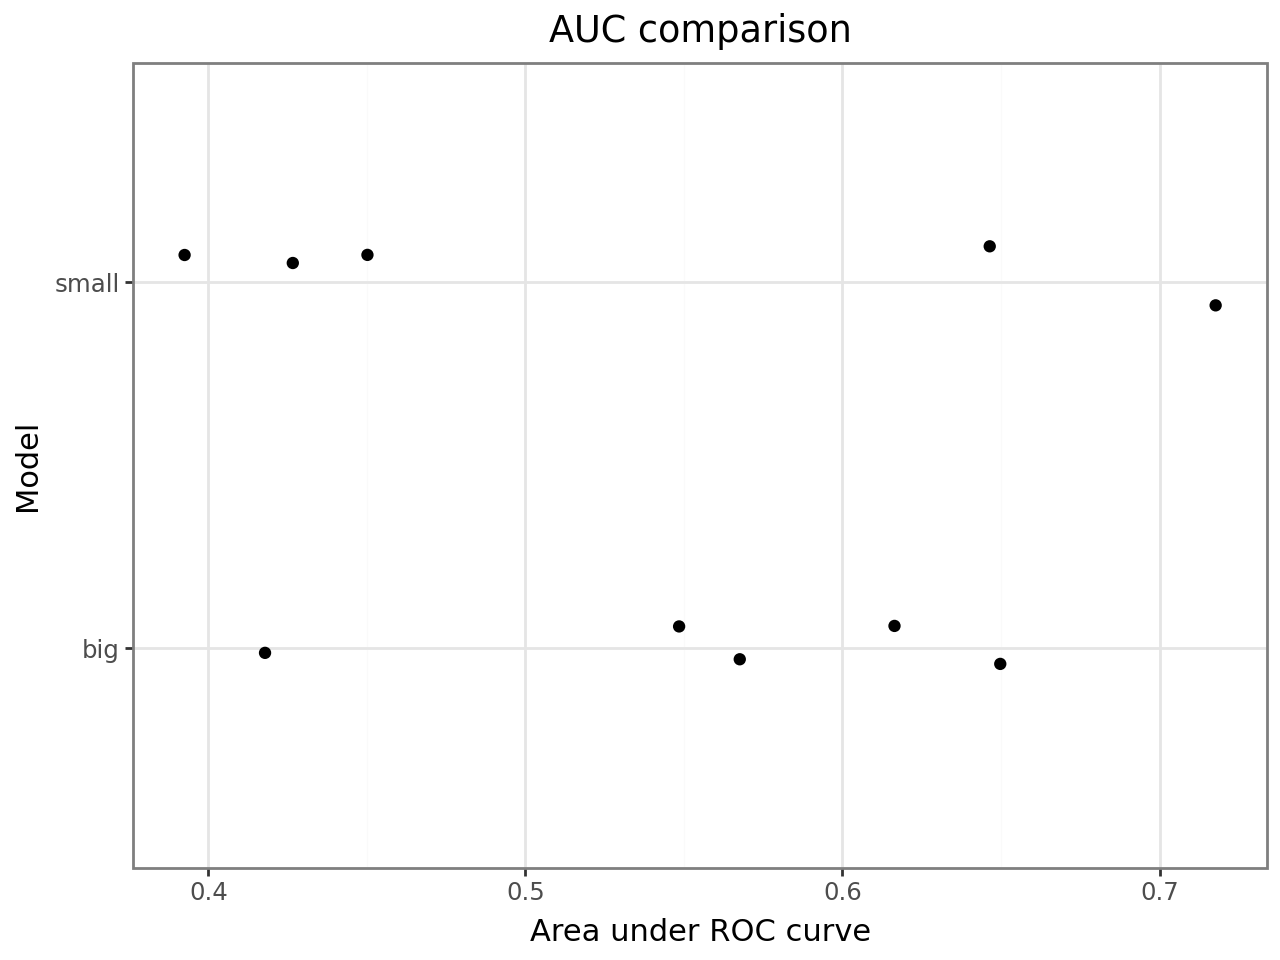

In [ ]:
# Plot the distribution of auc estimates
(ggplot(auc_df, aes(x='model', y='auc')) +
     geom_jitter(position=position_jitter(0.1)) +
     coord_flip() +
     labs(title = "AUC comparison",
          x="Model",
          y="Area under ROC curve"))

We can also test for differences using linear regression:

In [ ]:
# Use a two-sided test (based on linear regression) to see if there is a
# statistically significant difference in auc estimates
import statsmodels.formula.api as smf
lm_fit = smf.ols('auc~model', data=auc_df).fit()

In [ ]:
lm_fit.summary()

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    auc   R-squared:                       0.025
Model:                            OLS   Adj. R-squared:                 -0.097
Method:                 Least Squares   F-statistic:                    0.2043
Date:                Fri, 29 Nov 2024   Prob (F-statistic):              0.663
Time:                        23:37:16   Log-Likelihood:                 8.0592
No. Observations:                  10   AIC:                            -12.12
Df Residuals:                       8   BIC:                            -11.51
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.5603      0.054     10.368      0.000       0.436       0.685
model[T.small]    -0.0345      0.076     -0.452      0.663      -0.211       0.142
==============================================================================
Omnibus:                        0.921   Durbin-Watson:                   2.696
Prob(Omnibus):                  0.631   Jarque-Bera (JB):                0.652
Skew:                           0.218   Prob(JB):                        0.722
Kurtosis:                       1.828   Cond. No.                         2.62
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

There is a small decrease (2.8%) in average AUROC for the small model but it is not a statistically significant difference.

Finally, here are the ROC curves for both models:

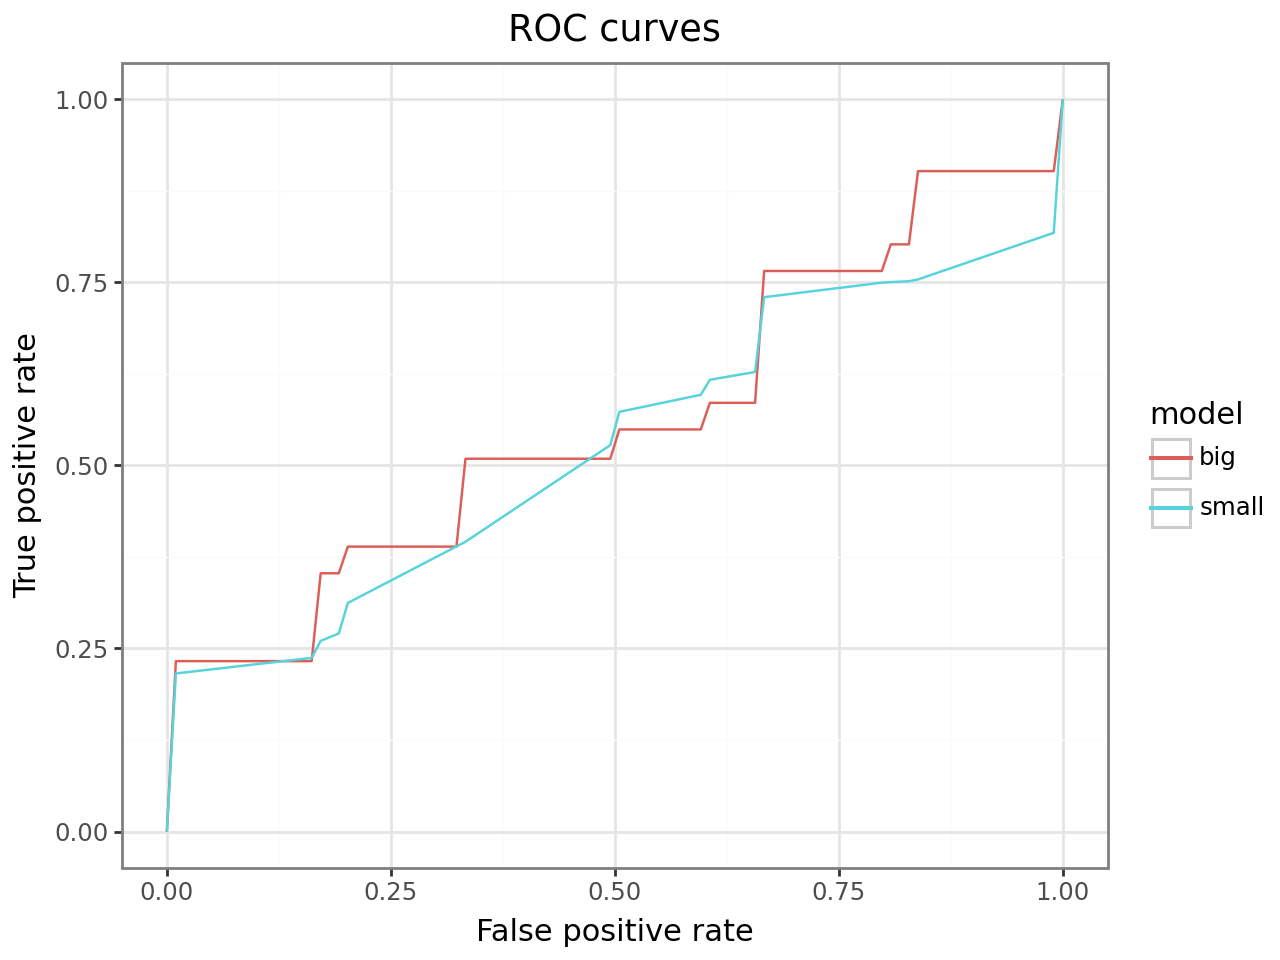

In [ ]:
mean_curve_df = curve_df.groupby(['model','fpr']).agg({'tpr': 'mean'}).reset_index()
(ggplot(mean_curve_df, aes(x='fpr', y='tpr', color='model')) +
    geom_line() +
    labs(title = "ROC curves",
         x = "False positive rate",
         y = "True positive rate"))

There is a small difference in the low false positive rate between the models but, essentially, these models perform very similarly. Neither model is very good at this task apparently.